<!--NAVIGATION-->
< [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) | [Contents](Index.ipynb) | [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# In Depth: Linear Regression

# 深入：线性回归

> Just as naive Bayes (discussed earlier in [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)) is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

就像朴素贝叶斯（前面在[深入：朴素贝叶斯分类](05.05-Naive-Bayes.ipynb)中讨论过）是分类任务的好入门点一样，线性回归模型是回归任务的好入门点。这样的模型因为它们能够快速的训练拟合以及非常容易解释而流行。也许你已经熟悉线性回归模型的简单形式（例如让一条直线拟合到数据上），但是这样的模型也能够扩展到更加复杂的数据上。

> In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

> We begin with the standard imports:

本节中我们首先快速直观的介绍这个著名问题背后的数学基础，然后再讨论这些线性模型如何能够泛化到适应更复杂的数据模式上。

我们先载入需要的包：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

## 简单线性回归

> We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

我们先从最熟悉的线性回归模型开始，用一条直线拟合数据。一条拟合直线的模型具有下面的数学形式
$$
y = ax + b
$$
其中的$a$通常被称为*斜率*，而$b$通常被成为*截距*。

> Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

下面的数据是一些随机散落在一条斜率为2截距为-5的直线附近的点：

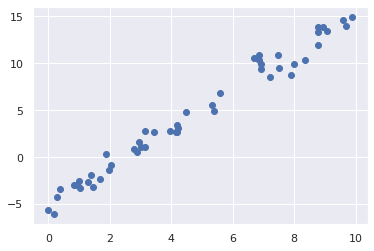

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

> We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

我们可以使用Scikit-Learn的`LinearRegression`评估器来拟合这些数据然后得到一条最佳拟合直线：

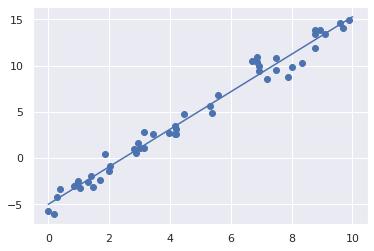

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

> The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

数据的斜率和截距可以在模型拟合参数中找到，在Scikit-Learn中总是使用下划线后缀来表示。这里相关的参数是`coef_`和`intercept_`：

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


> We see that the results are very close to the inputs, as we might hope.

可以看到结果非常接近输入，正如我们所料。

> The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

`LinearRegression`评估器能做的远不止于此，除了简单的直线拟合外，它还能处理多维线性模型的形式
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
这里有多个$x$值。几何上，这等同于在三维空间间使用一个平面拟合数据，或在更高维空间中使用超平面拟合数据。

> The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

这样的回归具有多维的本质，因此令它们比较难以可视化，但我们可以构造一些样例数据来查看这样的拟合，这里使用了NumPy的矩阵乘法操作：

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


> Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

这里$y$值是由三个随机$x$值构建的，而线性回归恢复了用来构建数据的斜率。

> In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

使用这种方法，我们可以使用单个`LinearRegression`评估器拟合直线、平面或超平面到数据上。目前为止这种方法看起来都限制在变量之间的线性关联上，但是实际上它还能完成更多的工作。

## Basis Function Regression

## 基本函数回归

> One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) and [Feature Engineering](05.04-Feature-Engineering.ipynb).
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

将线性回归应用在变量之间的非线性关系的一个技巧是，将数据通过*基本函数*进行转换。我们在[超参数和模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)和[特征工程](05.04-Feature-Engineering.ipynb)中已经看到过多项式回归`PolynomialRegression`管道操作中已经看到这个技巧的例子。这个方法是将一维的输入数据使用多维线性模型
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
来建立$x_1, x_2, x_3$等。即我们令$x_n = f_n(x)$其中的$f_n()$是用来转换数据的函数。

> For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

例如，如果令$f_n(x) = x^n$，我们的模型就会变成一个多项式回归：
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
注意这里模型仍然是*线性的*，线性的意思是指模型中的斜率$a_n$没有互相进行乘法或除法操作。这里起作用的是我们将一维的$x$值投射到了更高的维度上，这样我们的线性模型就能拟合$x$和$y$之间更加复杂的联系。

### Polynomial basis functions

### 多项式基本函数

> This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

这种多项式投射如此有用所以Scikit-Learn內建了实现它的方法，就是`PolynomialFeatures`转换：

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

> We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

我们看到上例中使用这个转换器我们对每个值求幂将一维数组变成了三维数组。这个新的高维数据表示能应用到线性回归中。

> As we saw in [Feature Engineering](05.04-Feature-Engineering.ipynb), the cleanest way to accomplish this is to use a pipeline.
Let's make a 7th-degree polynomial model in this way:

正如我们在[特征工程](05.04-Feature-Engineering.ipynb)中看到的，实现这个任务的最优雅犯法是使用管道。这里我们创建一个7阶的多项式模型：

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

> With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

有了这样的转换方式，我们可以使用线性模型来拟合复杂得多的$x$和$y$的关系。例如像下面的带有噪音的正弦波：

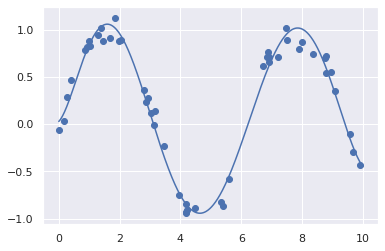

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

> Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

这个例子中，我们通过使用7阶多项式函数，使得我们的线性模型能够优异的拟合到这个非线性数据上。

### Gaussian basis functions

### 高斯基本函数

> Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

当然还有其他可用的基本函数。例如可以通过高斯函数叠加而不是多项式叠加来拟合模型。结果可能如下图所示：

![](figures/05.06-gaussian-basis.png)
[附录中生成图像的代码](#Gaussian-Basis)

> The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

上图中阴影部分是基本函数的范围，当这些阴影叠加在一起时就会产生上面光滑的拟合曲线。Scikit-Learn中没有內建这些高斯基本函数，但我们可以写一个自定义的转换器来构造它们，就像下面代码和图表展示那样（Scikit-Learn的转换器是使用Python类实现的；阅读Scikit-Learn的源代码是理解它们创建的好方法）：

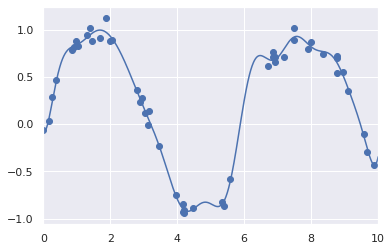

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """对一维数据进行均匀分布高斯转换"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # 沿着数据范围创建均匀分布的N个中心点
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

> We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

我们举这个例子只是为了表示多项式函数并不特殊：如果你对数据的生成过程有了什么灵感，你也可以使用它对应的函数来尝试。

## Regularization

## 正则化

> The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).
For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

将基本函数引入线性回归令我们的模型更加灵活，但是它很容易导致过拟合（参见[超参数和模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)中的讨论）。例如如果我们选择了太多的高斯函数，产生的结果就不太可靠了：

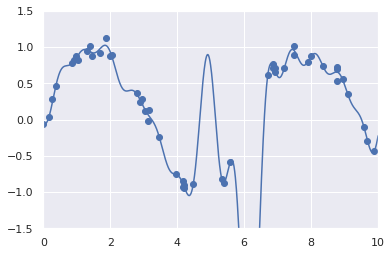

In [10]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

> With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

通过将数据投射到30维的空间上，该模型太过于灵活以至于当处于间隔距离较大的点之间的位置时候，会拟合成很极端的数据值。我们可以将高斯函数的系数也绘制在图表中，就可以看到原因：

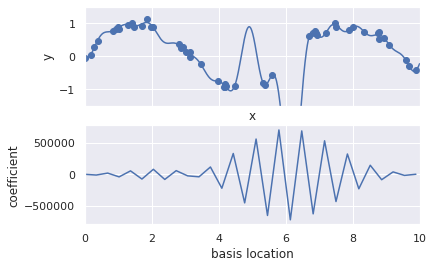

In [11]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

> The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

下面的图展示了基本函数在每个位置的振幅。这是当使用基本函数叠加的典型过拟合情况：邻近的基本函数的系数互相叠加到波峰和波谷。这种情形是错误的，如果我们能在模型中限制这样的尖刺能解决这个问题，通过在模型参数的大数值进行惩罚可以实现这个目标。这样的惩罚被成为*正则化*，它有几种形式。

### Ridge regression ($L_2$ Regularization)

### 岭回归（$L_2$正则化）

> Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

最常用的正则化方式被称为*岭回归*或$L_2$*正则化*，有的时候也被叫做*Tikhonov正则化*。这个过程通过对模型系数的平方和（2-范数）进行乘法；在这个例子中，模型的乘法是
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
其中$\alpha$是控制乘法力度的参数。这类的乘法模型內建在Scikit-Learn中`Ridge`评估器中：

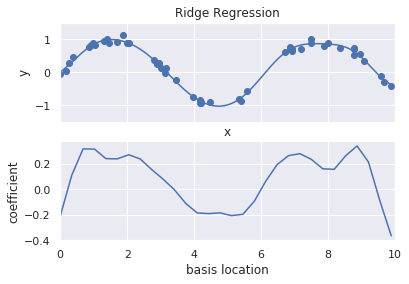

In [12]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

> The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

$\alpha$参数是用来控制模型复杂度的关键开关。极限情况$\alpha \to 0$时，恢复到标准线性回归结果；极限情况$\alpha \to \infty$时，所有模型的响应都会被压缩。岭回归的一大优点是它能非常有效的计算，基本没有产生比原始线性回归模型更大的计算消耗。

### Lasso regression ($L_1$ regularization)

### Lasso算法回归（$L_1$正则化）

> Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

另一个常用的正则化类型被称为lasso，通过惩罚回归系数绝对值和（1-范数）来实现：
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
虽然这在概念上非常类似岭回归，但是结果却大不相同：例如因为几何原因lasso回归更适合*稀疏模型*，即它倾向于将模型系数设置为0。

> We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

我们可以从下面的图中看到这个特点，这里将岭回归改成了使用L1正则化系数：

/home/wangy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021358158704868346, tolerance: 0.002065280097246271
  positive)


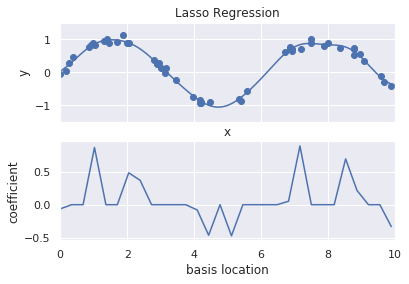

In [13]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

> With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).

使用了lasso回归惩罚，大部分的系数都变成了0，也就是只有小部分的基本函数在模型中产生了作用。就像岭回归正则化，$\alpha$参数调整惩罚的强度，这个参数应该通过比方说交叉验证（参见[超参数和模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)中的讨论）来确定。

## Example: Predicting Bicycle Traffic

## 例子：预测自行车流量

> As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.
We have seen this data already in [Working With Time Series](03.11-Working-with-Time-Series.ipynb).

我们来看一个例子，试图从天气、季节和其他因素中对西雅图费利蒙大桥的自行车交通流量数据进行预测。我们已经在[在时间序列上操作](03.11-Working-with-Time-Series.ipynb)一节中使用过这个数据。

> In this section, we will join the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.
Fortunately, the NOAA makes available their daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (I used station ID USW00024233) and we can easily use Pandas to join the two data sources.
We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

本节中，我们会将自行车数据与另外一个数据集联合起来，然后从中找到哪些天气和季节因素，比方说温度、降雨和日照时间，会影响到这条交通要道自行车流量数据。幸运的是美国国家海洋和大气管理局NOAA公开了每天[气象站数据](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND)（作者使用的是气象站ID USW00024233的数据），我们可以使用Pandas很容易地联合两个数据集。然后我们使用简单的线性回归来拟合相关的天气以及其他因素和自行车数量，以此来估计给定一天的任何其中一个参数改变对骑行者数量的影响。

> In particular, this is an example of how the tools of Scikit-Learn can be used in a statistical modeling framework, in which the parameters of the model are assumed to have interpretable meaning.
As discussed previously, this is not a standard approach within machine learning, but such interpretation is possible for some models.

特别这是在统计模型框架中使用Scikit-Learn工具的特别例子，其中的模型参数被认为是有可解释的含义的。正如之前讨论的，这不是机器学期的标准方法，但是对于一些模型来说这样的解释是存在的。

> Let's start by loading the two datasets, indexing by date:

让我们首先载入两个数据集，使用日期进行索引：

In [14]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [14]:
import pandas as pd
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

> Next we will compute the total daily bicycle traffic, and put this in its own dataframe:

然后我们计算每天自行车的总流量，把这个数据放进它自己的DataFrame中：

In [15]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # 移除其他列

> We saw previously that the patterns of use generally vary from day to day; let's account for this in our data by adding binary columns that indicate the day of the week:

我们之前看到自行车流量随着星期天数而发生不同变化；因此让我们将这点也考虑进来，为这个数据集增加7个布尔值的列表示星期天数：

In [16]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

> Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

类似的，我们也期望骑手们在节日会有不同习惯；让我们将这点也考虑进来，加入一个标识列：

In [17]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

> We also might suspect that the hours of daylight would affect how many people ride; let's use the standard astronomical calculation to add this information:

我们同样猜测日照时间也会影响多少人骑自行车；我们使用标准天文计算来增加这个信息：

(8, 17)

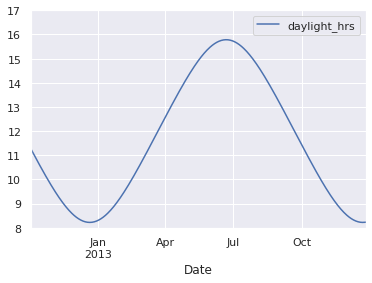

In [18]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """
    计算给定日期的日照时间
    axis 23.44 黄赤夹角
    latitude 47.61 西雅图纬度
    """
    # 2000年12月21日是冬至日，日照时间最短
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

> We can also add the average temperature and total precipitation to the data.
In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

我们也可以增加平均气温和总降雨量数据。除了单位为英寸的降雨量列外，我们再增加一列标志表示当天是否干燥（降雨量为0）：

In [19]:
# 气温单位是0.1摄氏度，求平均值
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# 降雨量单位是0.1毫米，转换为英寸
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

> Finally, let's add a counter that increases from day 1, and measures how many years have passed.
This will let us measure any observed annual increase or decrease in daily crossings:

最后，让我们增加一列计数器从第一天开始计数，然后转换成经过的年的小数数值。该列会在每年进行循环：

In [20]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

> Now our data is in order, and we can take a look at it:

现在我们总算准备好了数据，我们看一下：

In [21]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1,0.010959


> With this in place, we can choose the columns to use, and fit a linear regression model to our data.
We will set ``fit_intercept = False``, because the daily flags essentially operate as their own day-specific intercepts:

有了数据后，我们可以选择使用哪些列来让线性回归模型进行拟合。我们设置`fit_intercept=False`，因为每天的数据都有着那一天自己的截距：

In [22]:
# 移除所有有空值的行
daily.dropna(axis=0, how='any', inplace=True)

# 用来拟合模型的列包括星期几、日照小时数、降水量、是否有雨、气温、该天的年计数
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

> Finally, we can compare the total and predicted bicycle traffic visually:

最终我们将预测的自行车交通流量和实际总量进行比较绘制图表：

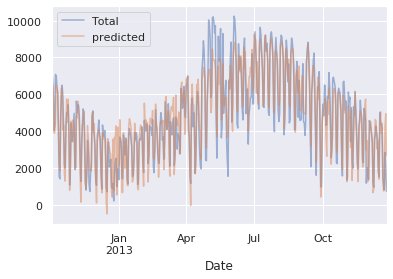

In [23]:
daily[['Total', 'predicted']].plot(alpha=0.5);

> It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).
Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

很明显我们遗失了一些关键的特征，特别是在夏天的时候。或者我们的特征不完整（如决定人们是否骑行的因素不止上述那些特征）或者数据之间具有非线性的关系我们并未考虑进来（如人们在高温和低温的情况下都会减少骑行）。无论如何，我们这个粗糙的估计给了我们一些内在解释，我们可以查看这个线性模型的系数，从中得到每个特征是如何影响每天自行车总量的：

In [24]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             1031.250152
Tue             1138.417420
Wed             1241.952231
Thu             1033.464822
Fri              430.231290
Sat            -1949.104025
Sun            -1925.447365
holiday        -2214.497205
daylight_hrs     240.062223
PRCP           -1389.481290
dry day         1031.715058
Temp (C)         135.081658
annual            37.916145
dtype: float64

> These numbers are difficult to interpret without some measure of their uncertainty.
We can compute these uncertainties quickly using bootstrap resamplings of the data:

这些数字如果没有一种对它们不确定性的度量方式的话很难解读。我们可以使用启动对数据的重采样来快速的计算这些不确定性：

In [25]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

> With these errors estimated, let's again look at the results:

估计误差后，我们看一下结果：

In [26]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon           1031.0  283.0
Tue           1138.0  266.0
Wed           1242.0  269.0
Thu           1033.0  276.0
Fri            430.0  261.0
Sat          -1949.0  260.0
Sun          -1925.0  275.0
holiday      -2214.0  478.0
daylight_hrs   240.0   31.0
PRCP         -1389.0  175.0
dry day       1032.0  103.0
Temp (C)       135.0   10.0
annual          38.0  109.0


> We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home.
Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

首先看到的是每周相对稳定的变化趋势：显然工作日比周末的骑行者要多得多。我们每天日照时间多一个小时，我们就会多出240.0 ± 31.0个骑行者；气温升高一摄氏度会多出135.0 ± 10.0个骑行者；晴天意味着会多出1032.0 ± 103.0个骑行者；而每多一英寸降雨意味着会有1389.0 ± 175.0个人决定将自行车留在家。一旦所有因素都计算在内，我们发现每年同一天会平均多出38.0 ± 109.0个骑行者。

译者注：上述数据根据译者的计算结果进行了修改。

> Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).
These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!

我们的模型基本可以肯定遗漏了一些相关的信息。例如，非线性效果（比方说降水量*和*低气温的共同作用）和每个变量的非线性趋势（比方说在非常热和非常冷的天气下骑车的缩减量），这个模型都没有计算在内。除此之外，我们还抛弃了一些细颗粒度的信息（例如下雨早晨和下雨下午的区别），而且我们还忽略了连续天数之间的关联（比方说预报周三下雨结果周二就下雨了或者是连续雨天后的一个意料外的晴天）。这些都是潜在有趣的效应，并且你现在已经有了能够进一步探索它们的工具了。

<!--NAVIGATION-->
< [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) | [Contents](Index.ipynb) | [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
